In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df = df.drop(["id","date"], axis = 1)

In [5]:
y = df['price']

In [6]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [7]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [8]:
X = df.drop(['price'], axis = 1)

In [9]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
X.shape

(21613, 18)

In [11]:
y.shape

(21613,)

# VISUALIZING THE DATA

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

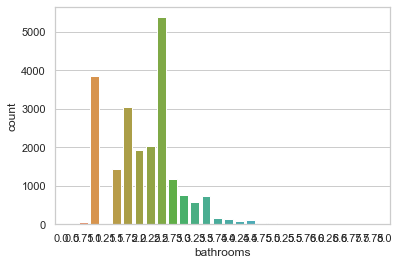

In [31]:
sns.set(style = 'whitegrid')
sns.countplot(data = df, x = df.bathrooms)

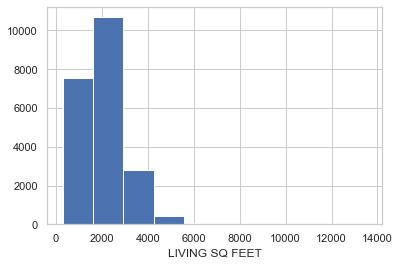

In [32]:
plt.hist(df.sqft_living)
plt.xlabel('LIVING SQ FEET')
plt.show()

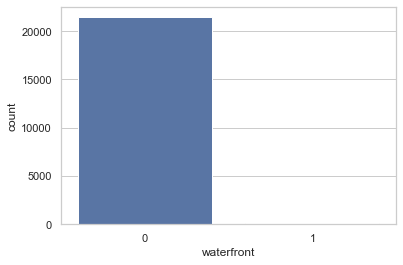

In [33]:
sns.countplot(data = df, x = df.waterfront)

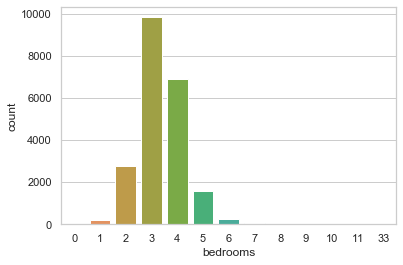

In [34]:
sns.countplot(data = df, x = df.bedrooms)

In [ ]:
sns.pairplot()

# MODELING

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [14]:
X_train.shape

(15129, 18)

In [15]:
y_train.shape

(15129,)

In [16]:
X_test.shape

(6484, 18)

# Practical Implementation of all Algorithms for Regression 

# 1. K-Nearest Neighbors

https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [17]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
rmse = []
for k in range(30):
    
    k = k + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,predict))
    rmse.append(error)
    #print("RMSE value for k =", k, "is", error)    

In [19]:
print(rmse)

[314321.2153621939, 278685.6870437568, 265856.55106983794, 263722.69213570596, 261150.06834845158, 261648.37624808575, 262611.5558387159, 263885.1965368447, 263233.6631220072, 264067.97071098577, 264739.37519736367, 265908.8982335413, 266428.00168184633, 266778.7919557174, 266585.8542306046, 266500.40917295107, 266667.8819946993, 267700.4233101027, 268298.10146162275, 268806.20840013324, 268927.8478125494, 268951.0440724608, 269127.53879534744, 268754.4424683634, 268653.4374974624, 268824.61533308926, 269012.7628525962, 269317.98104475316, 269813.2595265045, 270090.46719663544]


In [20]:
min(rmse)

235782.30400761415

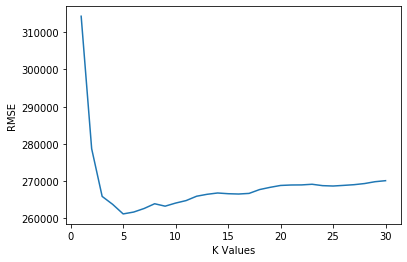

In [20]:
plt.plot(range(1,31), rmse)
plt.xlabel("K Values")
plt.ylabel("RMSE")
plt.show()

In [21]:
import operator
min_index, min_value = min(enumerate(rmse), key=operator.itemgetter(1))


In [22]:
print("The value of k, where rmse is minimum is:  ", min_index)

The value of k, where rmse is minimum is:   4


In [23]:
print("The rmse for", min_index, "is :" ,min_value)

The rmse for 4 is : 261150.06834845158


# 2. LINEAR REGRESSION

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# MULTIPLE LINEAR REGRESSION

y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn
This is the equation of a hyperplane. Remember, a linear regression model in two dimensions is a straight line; 
in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(lin_reg.intercept_)

10851203.4456556


In [27]:
print(lin_reg.coef_)

[-3.78985350e+04  4.48924919e+04  1.17779543e+02  1.67493660e-01
  2.51862928e+03  6.14284835e+05  5.63919618e+04  2.58652611e+04
  9.37300138e+04  7.63245101e+01  4.14550333e+01 -2.60924942e+03
  1.55930082e+01 -6.57712939e+02  6.14686426e+05 -2.36381418e+05
  1.54606472e+01 -4.33596751e-01]


In [39]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns = ['coefficient'])
coeff_df

,coefficient
bedrooms,-37898.534971
bathrooms,44892.491933
sqft_living,117.779543
sqft_lot,0.167494
floors,2518.629285
waterfront,614284.834521
view,56391.961817
condition,25865.261058
grade,93730.013844
sqft_above,76.324510


In [28]:
y_predict = lin_reg.predict(X_test)

In [29]:
y_predict

array([ 609619.85505577,  186977.30515351,  554556.26996368, ...,
        473830.39576261,  594802.23307101, 1446898.81734712])

In [30]:
len(y_predict)

6484

In [31]:
LR_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [32]:
LR_df = LR_df.reset_index()

In [33]:
LR_df.drop(['index'], axis = 1, inplace=True)

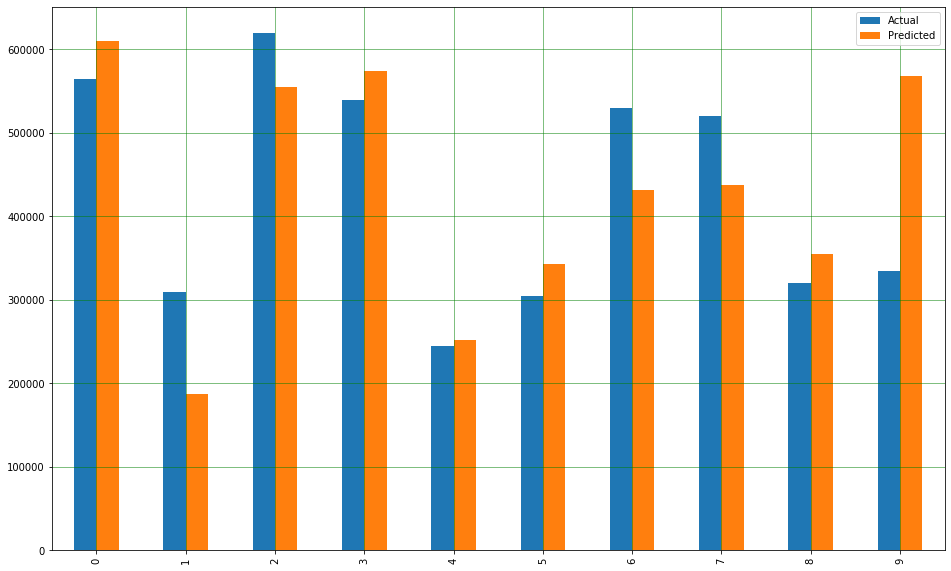

In [34]:
df1 = LR_df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [35]:
LR_df.head(3)

,Actual,Predicted
0,565000.0,609619.855056
1,310000.0,186977.305154
2,620000.0,554556.269964


In [36]:
LR_df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [37]:
#LR_rmse = []
#for i in range(len(LR_df)):
 #   LR_error = sqrt(mean_squared_error(LR_df['Actual'][i], LR_df['Predicted'][i]))
 #

In [38]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 191235.28125776481
